In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('fake_users_data.csv', index_col=0)

In [3]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [4]:
def mapping(x):
    if x == 'Gratis':
        return 1
    elif x == '1-50 Euros':
        return 2
    elif x == '+50 Euros':
        return 3
    else:
        return 9999

df['price'] = df['price'].apply(mapping)

# DATA PREPARATION

In [5]:
X = df.drop(columns=['route_id'], axis=1)
y = df[['route_id']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

C:\Users\Paris\AppData\Local\Temp\ipykernel_4076\2477965460.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [8]:
y_pred_rf

array(['Entre Naranjos', 'Entre Naranjos',
       'Ruta Carrer Russafa - la Llotja', ..., 'Sant Agustí - Portal Nou',
       'Arbres: La volta al món',
       "Ruta recinte enmurallat d'època islàmica"], dtype=object)

In [9]:
accuracy_score(y_test, y_pred_rf)

0.692

<AxesSubplot:>

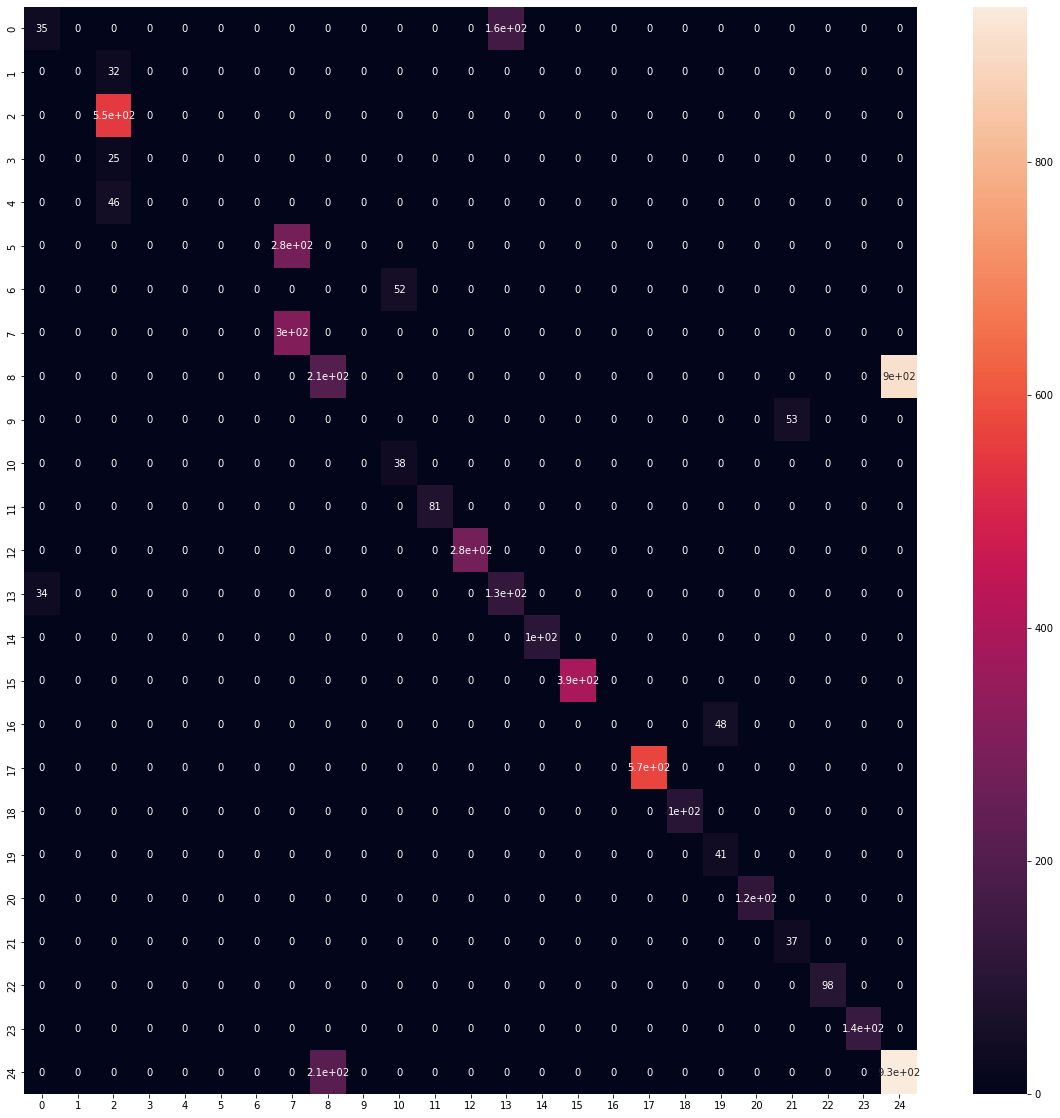

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

In [11]:
rnd_clf.feature_names_in_

array(['time', 'price', 'age_+45', 'age_0-18', 'age_18-35', 'age_35-45',
       'gender_Hombre', 'gender_Mujer', 'gender_Otro', 'type_Historica',
       'type_Literaria', 'type_Patrimonio', 'type_Turistica', 'diff_Alta',
       'diff_Baja', 'comp_Amigos', 'comp_Familia', 'comp_Pareja',
       'comp_Solo', 'trans_A Pie', 'trans_Bicicleta'], dtype=object)

In [12]:
rnd_clf.feature_importances_

array([1.99016754e-02, 8.76338443e-05, 1.70934824e-02, 1.72627663e-02,
       1.78136964e-01, 1.62385830e-02, 7.00227644e-05, 4.57945606e-05,
       5.46025372e-05, 9.55886483e-02, 6.38619767e-02, 6.72707414e-02,
       9.25249613e-02, 1.84018260e-01, 1.83275239e-01, 5.23150153e-05,
       1.29428607e-04, 7.78057683e-05, 7.23020894e-05, 3.38734117e-02,
       3.03633853e-02])

In [13]:
# Guardar modelo
filename = 'finished_model.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(rnd_clf, archivo_salida)